In [1]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import datasets
from scipy import stats

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## EDA ON Dataset

In [7]:
df.duplicated().any()

False

In [8]:
columns = list(df.columns)

for kolom in columns:
    df.loc[df[kolom]=='?', kolom] = np.nan

In [9]:
# Cek apakah data yang missing/null dll
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]
missing_data(df)

,columns,Num of Miss,Perc of Miss
1,normalized-losses,41,20.00000
5,num-of-doors,2,0.97561
18,bore,4,1.95122
19,stroke,4,1.95122
21,horsepower,2,0.97561
22,peak-rpm,2,0.97561
25,price,4,1.95122


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
#change data type for missing values
miss_float = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price', ]

for kolom in miss_float:
    df[kolom] = df[kolom].astype('float')

In [12]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
1,normalized-losses,41,20.00000
5,num-of-doors,2,0.97561
18,bore,4,1.95122
19,stroke,4,1.95122
21,horsepower,2,0.97561
22,peak-rpm,2,0.97561
25,price,4,1.95122


In [13]:
miss_float.pop()

'price'

In [14]:
miss_float

for kolom in miss_float:
    df[kolom] = df[kolom].fillna(df[kolom].median())

In [15]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [16]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
25,price,4,1.95122


In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(201, 26)

In [19]:
df.reset_index(inplace=True)

In [20]:
df.drop('index', axis=1, inplace=True)

In [21]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


**Make Some Visualization**

In [22]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

**Apakah tipe bahan bakar mempengaruhi harga?**

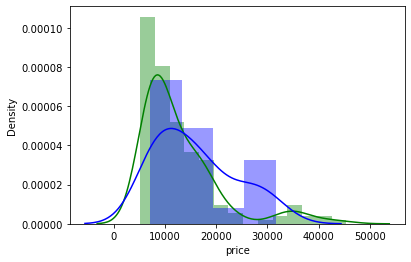

In [23]:
sns.distplot(df[df['fuel-type']=='gas']['price'], color='green')
sns.distplot(df[df['fuel-type']=='diesel']['price'], color='blue')

# Data Preparation

#### Encode Data

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [25]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [27]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,symboling,float64,0,0.0,6,"[0.0, 1.0]",2.99
1,normalized-losses,float64,0,0.0,51,"[115.0, 122.0, 65.0]",25.37
2,make,object,0,0.0,22,"[honda, volkswagen, mercedes-benz]",10.95
3,fuel-type,object,0,0.0,2,[gas],1.00
4,aspiration,object,0,0.0,2,[std],1.00
5,num-of-doors,object,0,0.0,2,[four],1.00
6,body-style,object,0,0.0,5,"[wagon, sedan]",2.49
7,drive-wheels,object,0,0.0,3,[fwd],1.49
8,engine-location,object,0,0.0,2,[front],1.00
9,wheel-base,float64,0,0.0,52,"[89.5, 97.3, 100.4]",25.87


In [28]:
non_ordinal = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
label_encode = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
find_replace = ['num-of-cylinders']

Label Encode

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

for kolom in label_encode:
    df[kolom] = le.fit_transform(df[kolom])

In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,1,0,1,convertible,rwd,0,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,1,0,1,convertible,rwd,0,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,1,0,1,hatchback,rwd,0,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,1,0,0,sedan,fwd,0,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,1,0,0,sedan,4wd,0,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


One Hot Encoding

In [32]:
df = pd.get_dummies(df, columns=non_ordinal, drop_first=True)

Find and Replace

In [33]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [34]:
num_replace = {
    'num-of-cylinders' : { 'four':4, 'six':6, 'five': 5, 'three': 3, 'twelve': 12, 'two':2, 'eight': 8}
}

df.replace(num_replace, inplace=True)

In [35]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0


In [36]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
engine-size             0.872335
curb-weight             0.834415
horsepower              0.810500
width                   0.751265
num-of-cylinders        0.708645
length                  0.690628
drive-wheels_rwd        0.637522
wheel-base              0.584642
bore                    0.543158
make_mercedes-benz      0.524953
fuel-system_mpfi        0.509698
engine-type_ohcv        0.394454
make_jaguar             0.332180
make_bmw                0.331607
engine-location         0.331062
make_porsche            0.327029
body-style_hardtop      0.231180
aspiration              0.179578
body-style_sedan        0.148105
make_volvo              0.147394
height                  0.135486
fuel-system_idi         0.110326
make_audi               0.102938
normalized-losses       0.094366
stroke                  0.082209
compression-ratio       0.071107
make_peugot             0.069263
engine-type_l           0.045151
make_saab               0.044614
make_mercu

#### Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('price', axis=1)
y = df['price']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
X_train.shape

(160, 53)

In [156]:
X_test.shape

(41, 53)

In [157]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.0,0.261780,0.0,1.0,0.0,0.083333,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.261780,0.0,1.0,0.0,0.083333,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.261780,0.0,1.0,0.0,0.383333,0.343396,0.100000,0.666667,0.1250,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.0,0.0,0.0,0.541667,0.181132,0.464286,0.633333,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.0,0.0,0.0,0.541667,0.283019,0.464286,0.633333,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


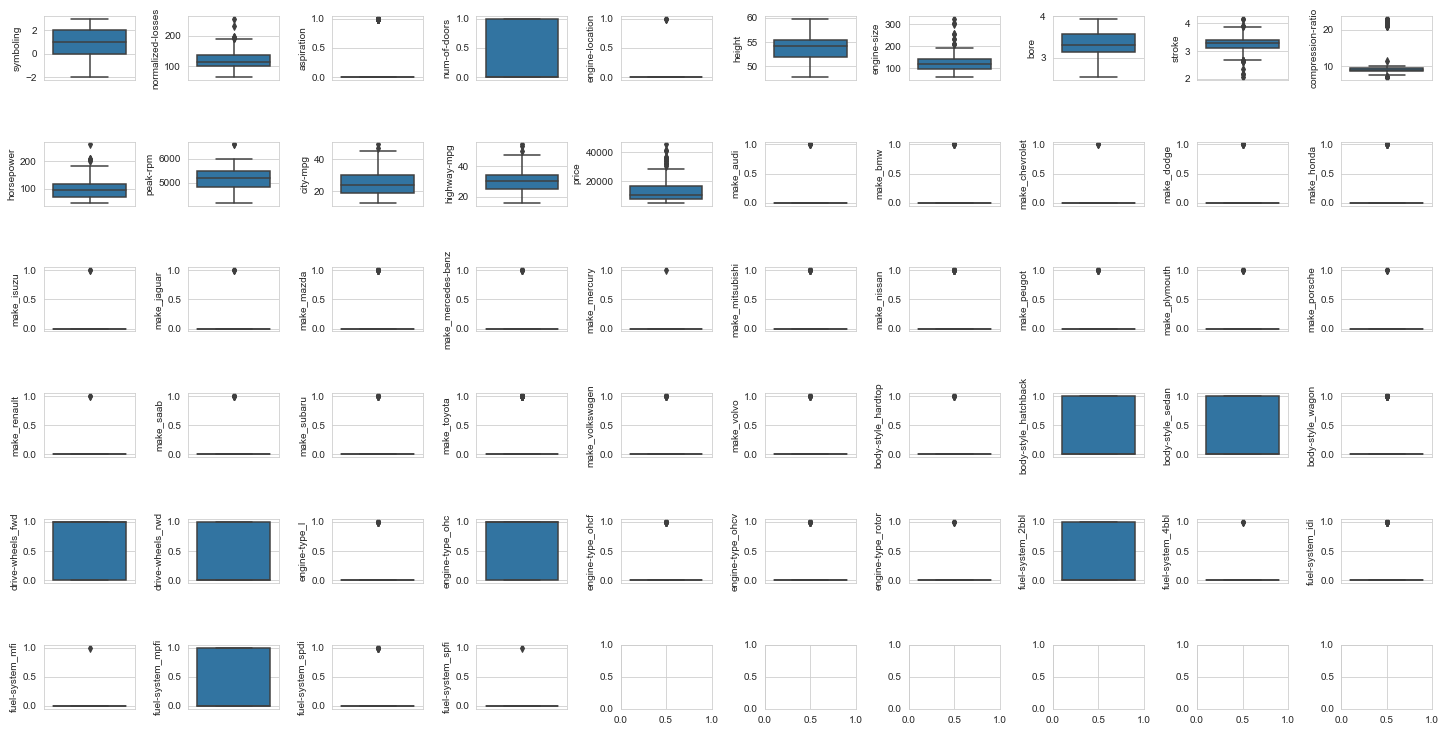

In [158]:
fig, axs = plt.subplots(nrows=6, ncols=10, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [159]:
import scipy.stats as st
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df_clean=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

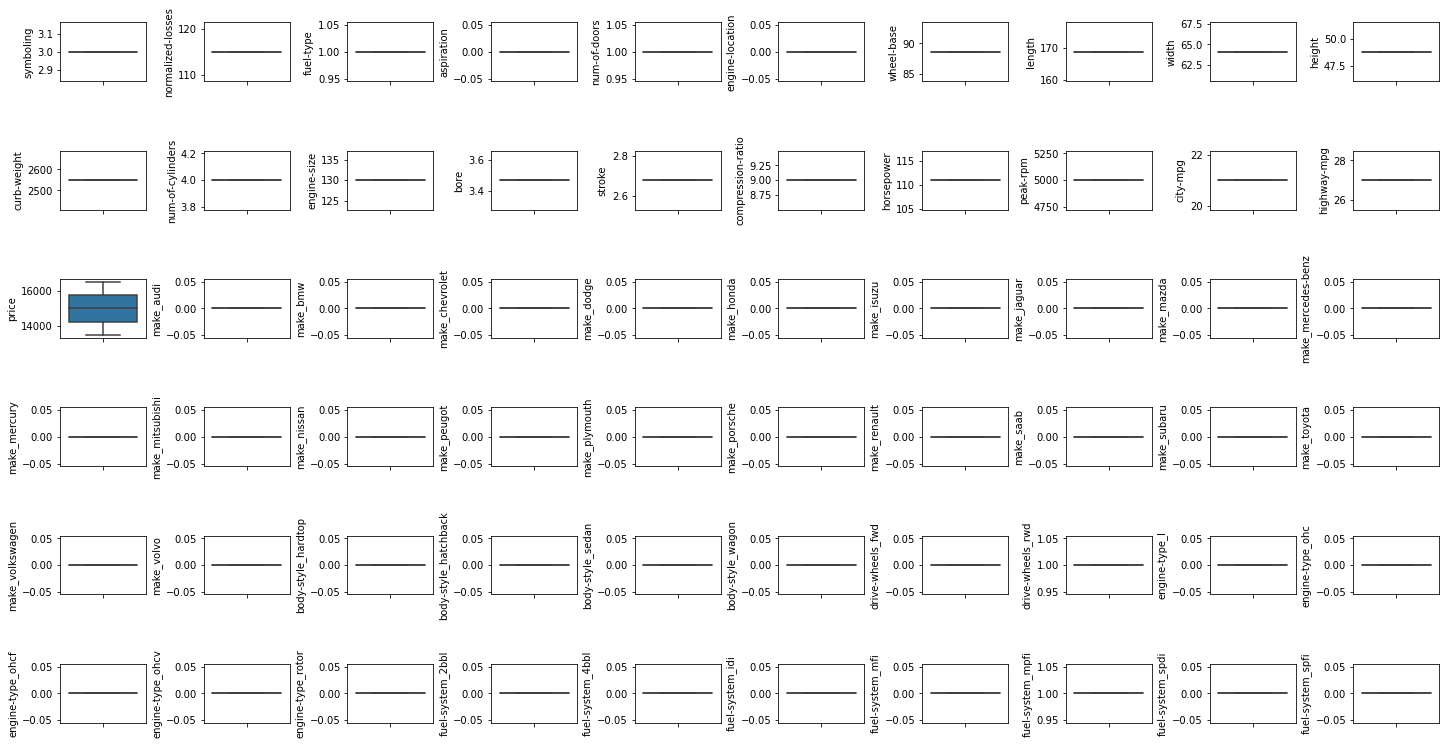

In [94]:
fig, axs = plt.subplots(nrows=6, ncols=10, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df_clean.items():
    sns.boxplot(y=k, data=df_clean, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [95]:
df.describe()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,0.900498,0.179104,0.427861,0.014925,98.797015,174.200995,65.889055,53.766667,...,0.074627,0.064677,0.019900,0.318408,0.014925,0.099502,0.004975,0.457711,0.044776,0.004975
std,1.254802,32.111623,0.300083,0.384397,0.496004,0.121557,6.066366,12.322175,2.101471,2.447822,...,0.263444,0.246568,0.140007,0.467022,0.121557,0.300083,0.070535,0.499452,0.207328,0.070535
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,1.000000,0.000000,0.000000,0.000000,94.500000,166.800000,64.100000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,115.000000,1.000000,0.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.000000,1.000000,0.000000,1.000000,0.000000,102.400000,183.500000,66.600000,55.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.000000,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.000000,59.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


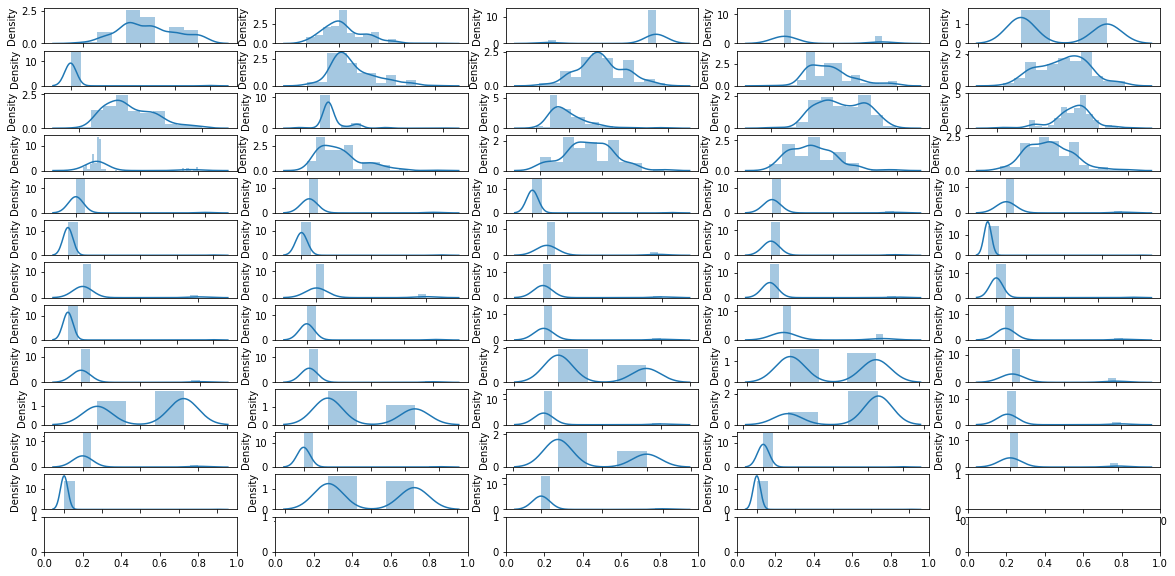

In [96]:
fig, axs = plt.subplots(ncols=5, nrows=13, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k in X:
        sns.distplot(X[k], ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [97]:
for k in X:
    if (X[k].skew()) > 0.5 or (X[k].skew()) < -0.5:
        print(k,X[k].skew(),'------------> highly skewed')
    else:
        print(k,X[k].skew())

0 0.19737036029756175
1 0.9571766454422634 ------------> highly skewed
2 -2.6960723403217095 ------------> highly skewed
3 1.6863838635859196 ------------> highly skewed
4 0.2938054193377397
5 8.061230492758208 ------------> highly skewed
6 1.0312614426719526 ------------> highly skewed
7 0.15444635183586627
8 0.8750290419412804 ------------> highly skewed
9 0.029173299149268077
10 0.7058035875297617 ------------> highly skewed
11 2.899682570707958 ------------> highly skewed
12 1.979144196636353 ------------> highly skewed
13 -0.02829119053945174
14 -0.7067440253376137 ------------> highly skewed
15 2.5844624326120735 ------------> highly skewed
16 1.1530190308952588 ------------> highly skewed
17 0.10306871765707817
18 0.6804334707346067 ------------> highly skewed
19 0.5495071459179169 ------------> highly skewed
20 5.567097448635059 ------------> highly skewed
21 4.743599673908462 ------------> highly skewed
22 8.061230492758206 ------------> highly skewed
23 4.435465144913342 ----

In [58]:
for k in X:
    if (X[k].skew()) > 0.5 or (X[k].skew()) < -0.5:
        X[k] = np.log1p(X[k])

In [59]:
for k in X:
    if (X[k].skew()) > 0.5 or (X[k].skew()) < -0.5:
        print(k,X[k].skew(),'------------> highly skewed')
    else:
        print(k,X[k].skew())

0 0.19737036029756175
1 0.5490845250469055 ------------> highly skewed
2 -2.696072340321709 ------------> highly skewed
3 1.6863838635859196 ------------> highly skewed
4 0.2938054193377397
5 8.061230492758192 ------------> highly skewed
6 0.6829142210695583 ------------> highly skewed
7 0.15444635183586627
8 0.5272990707999639 ------------> highly skewed
9 0.029173299149268077
10 0.4077665346932642
11 2.0569713243089423 ------------> highly skewed
12 1.4579521457399303 ------------> highly skewed
13 -0.02829119053945174
14 -1.2647515771635163 ------------> highly skewed
15 2.4700676946074056 ------------> highly skewed
16 0.8186589950570713 ------------> highly skewed
17 0.10306871765707817
18 0.29564096490206576
19 0.15245870587634888
20 8.061230492758192 ------------> highly skewed
21 5.567097448635065 ------------> highly skewed
22 4.743599673908469 ------------> highly skewed
23 8.061230492758192 ------------> highly skewed
24 4.435465144913345 ------------> highly skewed
25 3.566

## Linear Regression

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [160]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [161]:
# Value of y intercept
model_lr.intercept_

16401.300623705105

In [162]:
# Model prediction on train data
y_pred_lr = model_lr.predict(X_train)

In [163]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_lr))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr)))

R^2: 0.9520766017366047
Adjusted R^2: 0.928114902604907
MAE: 1093.5870286866866
MSE: 2186568.9362666598
RMSE: 1478.7051552850758


In [164]:
# Model prediction on test data
y_test_pred_lr = model_lr.predict(X_test)
# Model Evaluation
acc_lr = metrics.r2_score(y_test, y_test_pred_lr)
print('R^2:',metrics.r2_score(y_test, y_test_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_lr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_lr))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))

R^2: 0.9177984895179585
Adjusted R^2: 1.2529277245601276
MAE: 1837.6578882187061
MSE: 10057089.550000599
RMSE: 3171.2914640569697


In [165]:
y_test = pd.DataFrame(y_test)

In [166]:
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_lr, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['MEDV']-compare_mlr['Prediction']
compare_mlr.head(20)

,price,Prediction
0,8249.0,21261.196453
1,41315.0,9359.632721
2,6855.0,6192.189775
3,9258.0,22018.000000
4,11850.0,16390.207315
5,5572.0,5749.983912
6,35056.0,6575.000000
7,9988.0,8929.702345
8,15998.0,5698.558015
9,35550.0,17625.052587


In [167]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_mlr['price']-compare_mlr['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.5143064238887098
Little to no autocorrelation 

Assumption satisfied


In [139]:
#Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,7.671426e+00,symboling
1,3.925178e+00,normalized-losses
2,1.812159e+04,fuel-type
3,6.194468e+00,aspiration
4,4.377082e+00,num-of-doors
5,inf,engine-location
6,1.996811e+01,wheel-base
7,2.375234e+01,length
8,1.341844e+01,width
9,8.347201e+00,height


In [151]:
df.drop(columns=['fuel-type', 'wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders'], inplace=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0016746747986205518
Residuals are not normally distributed


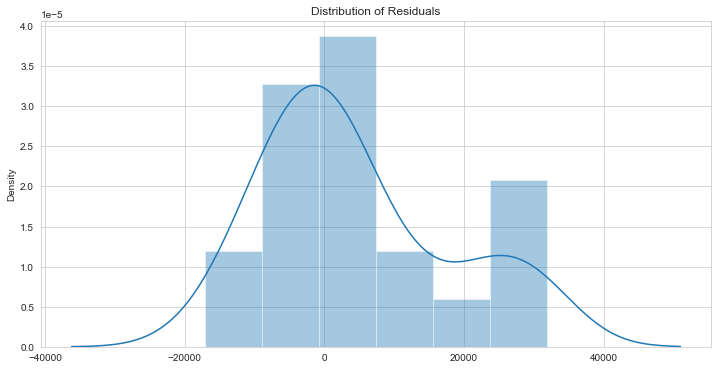


Assumption not satisfied


In [168]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_mlr['price']-compare_mlr['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_mlr['price']-compare_mlr['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

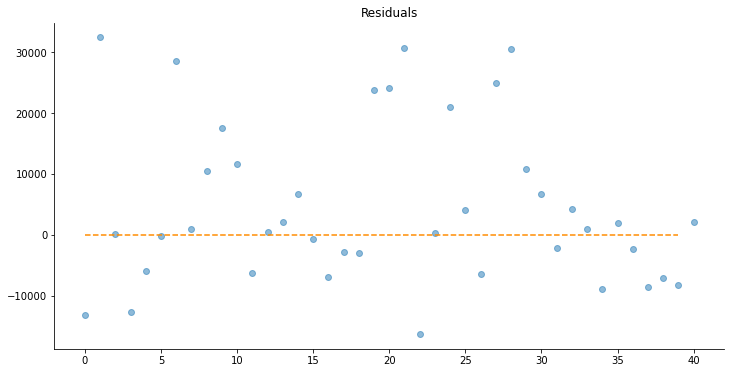

In [110]:
# Cek homoskedastisitas
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=compare_mlr.index, y=compare_mlr['price']-compare_mlr['Prediction'], alpha=0.5)
plt.plot(np.repeat(0, compare_mlr.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

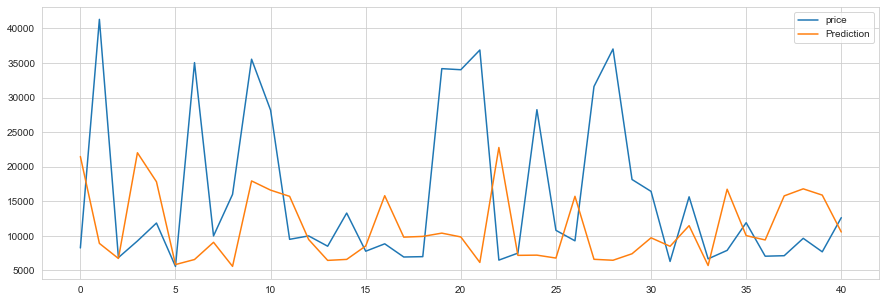

In [111]:
sns.set_style('whitegrid')
compare_mlr.head(50).plot(kind='line', figsize=(15, 5))

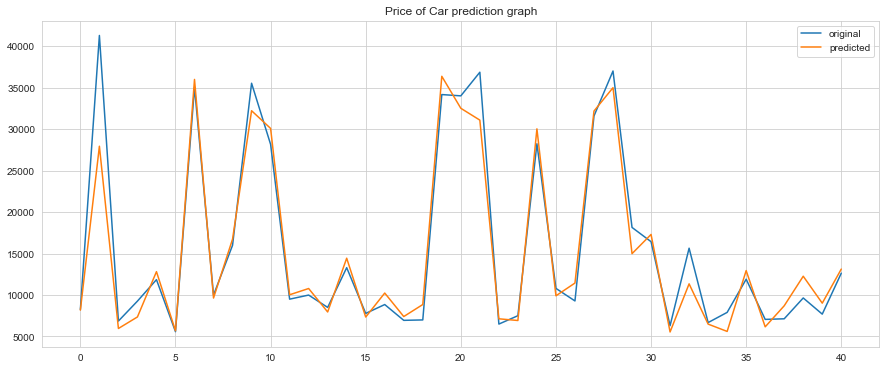

In [112]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_lr, label="predicted")
plt.title("Price of Car prediction graph")
plt.legend()
plt.show()

In [113]:
# Membuat X dan y
X_rf = df.drop(columns='price')
y_rf = df[['price']]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [115]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)

In [117]:
# Model Evaluation Training
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9827194301051122
Adjusted R^2: 0.9725238938671285
MAE: 590.516396875
MSE: 788449.0395583529
RMSE: 887.9465296730164


In [118]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)

In [119]:
# Model Evaluation Testing
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.9208254235351523
Adjusted R^2: 1.1666833188733636
MAE: 1954.7652195121955
MSE: 9686753.940662721
RMSE: 3112.3550473335654


In [120]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Strength']-compare_mlr['Prediction']
compare_rfg.head(20)

,price,Prediction
0,8249.0,20880.060000
1,41315.0,9305.100000
2,6855.0,7084.441667
3,9258.0,19399.840000
4,11850.0,18036.230000
5,5572.0,6104.900000
6,35056.0,6355.285000
7,9988.0,10065.070000
8,15998.0,5895.460000
9,35550.0,18183.270000


In [121]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_rfg['price']-compare_rfg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.4732485258380175
Signs of positive autocorrelation 

Assumption not satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0003640052778803203
Residuals are not normally distributed


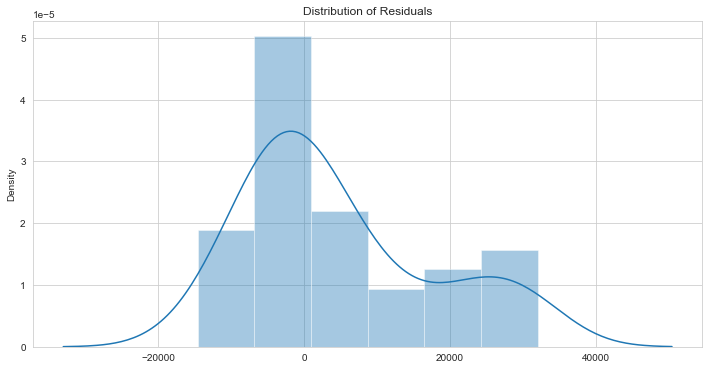


Assumption not satisfied


In [122]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_rfg['price']-compare_rfg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_rfg['price']-compare_rfg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

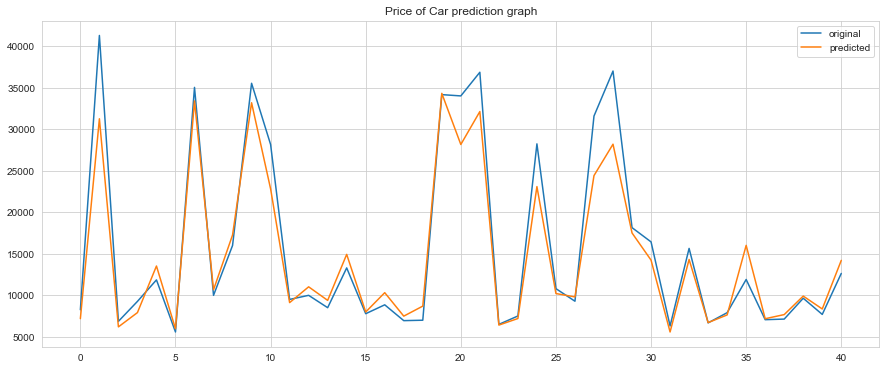

In [123]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("Price of Car prediction graph")
plt.legend()
plt.show()

In [124]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)

In [126]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9989819984462989
Adjusted R^2: 0.9983813775296152
MAE: 52.421319580078126
MSE: 46447.67806656659
RMSE: 215.51723380408953


In [127]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)

In [128]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.9460717043176757
Adjusted R^2: 1.1135332540680511
MAE: 1661.5947384717988
MSE: 6597952.954581476
RMSE: 2568.648079161775


In [129]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xg, columns=['Prediction']))
#compare_xg['Residuals'] = compare_xg['price']-compare_mlr['Prediction']
compare_xg.head(20)

,price,Prediction
0,8249.0,21485.705078
1,41315.0,8850.941406
2,6855.0,7141.374512
3,9258.0,22015.142578
4,11850.0,16845.875000
5,5572.0,6476.711914
6,35056.0,6574.220703
7,9988.0,10194.099609
8,15998.0,5505.201660
9,35550.0,18151.431641


In [130]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['price']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.4800337557649954
Signs of positive autocorrelation 

Assumption not satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.001155789429409122
Residuals are not normally distributed


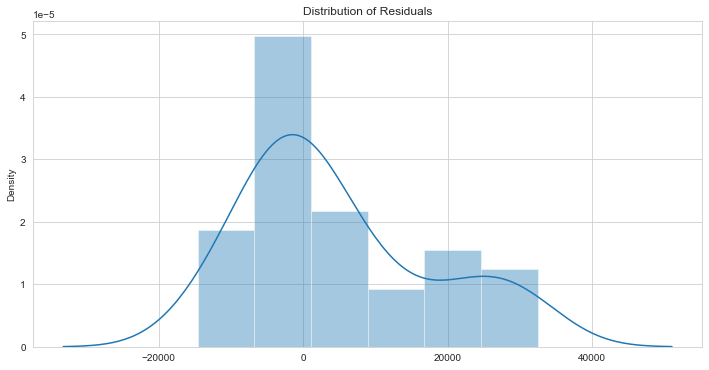


Assumption not satisfied


In [131]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['price']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['price']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

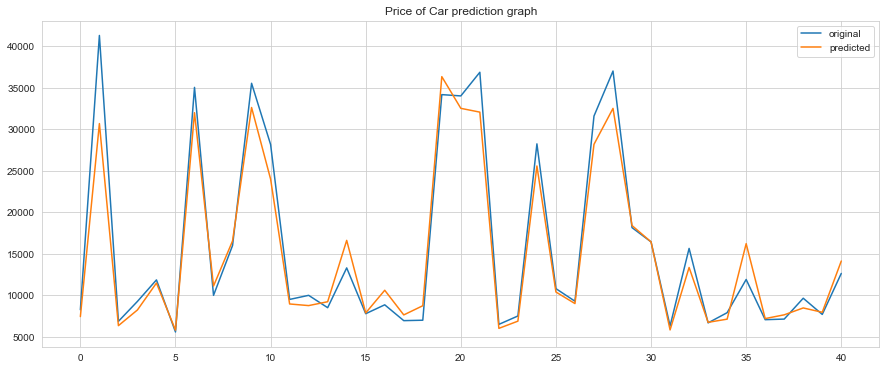

In [132]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("Price of Car prediction graph")
plt.legend()
plt.show()

In [136]:
# Membandingkan hasil dari modelling yang sudah dilakukan
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_lr*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,94.607170
0,Linear Regression,93.791982
1,Random Forest,92.082542


In [138]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest', 'XGBoost'],
    'RMSE Score': [rmse_lr, rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE Score', ascending=True)

,Model,RMSE Score
2,XGBoost,2568.648079
0,Linear Regression,2755.958836
1,Random Forest,3112.355047


## Kesimpulan

Berdasarkan model yang sudah dibuat, R^2 terbesar dan RMSE terkecil adalah XGBOOST Regression.
Untuk itu, model yang bisa digunakan dalam memprediksi harga AutoMobile adalah 

## XGBOOST Regression